# **Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import joblib

# **Load Dataset**

In [2]:
panelA = pd.read_csv('../Dataset/PanelAs__202505281600 new.csv')
panelB = pd.read_csv('../Dataset/PanelBs__202506041149 new.csv')

# **Data Understanding**

## Panel A (Sebelum Filtrasi)

| Nama Kolom    | Deskripsi                                                               |
| ------------- | ----------------------------------------------------------------------- |
| **id**        | ID unik untuk setiap baris data sensor.                                 |
| **timestamp** | Waktu pengambilan data sensor pada Panel A (format string/datetime).    |
| **flow1**     | Nilai aliran air dari sensor flow meter 1 (Panel A).                    |
| **turbidity** | Tingkat kekeruhan air dengan satuan Nephelometric Turbidity Unit (NTU). |
| **ph**        | Tingkat keasaman/alkalinitas air.                                       |
| **tds**       | Total padatan terlarut (ppm).                                           |
| **createdAt** | Waktu data dicatat pertama kali ke sistem/database.                     |
| **updatedAt** | Waktu data terakhir diperbarui di sistem/database.                      |


In [3]:
panelA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1048575 non-null  int64  
 1   timestamp  1048575 non-null  object 
 2   flow1      939984 non-null   float64
 3   turbidity  1048575 non-null  float64
 4   ph         1048575 non-null  float64
 5   tds        1048575 non-null  float64
 6   createdAt  1048575 non-null  object 
 7   updatedAt  1048575 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 64.0+ MB


In [4]:
panelA.shape

(1048575, 8)

In [5]:
panelA.head()

,id,timestamp,flow1,turbidity,ph,tds,createdAt,updatedAt
0,392388,1/1/1970 7:34,0.0,6.682701,7.85,154.5025,2/17/2025 16:13,2/17/2025 16:13
1,392389,1/1/1970 7:34,0.0,6.687761,7.85,154.5198,2/17/2025 16:13,2/17/2025 16:13
2,392390,1/1/1970 7:35,0.0,6.691935,7.85,154.5198,2/17/2025 16:14,2/17/2025 16:14
3,392391,1/1/1970 7:35,0.0,6.685376,7.85,154.4954,2/17/2025 16:14,2/17/2025 16:14
4,392392,1/1/1970 7:35,0.0,6.679331,7.85,154.5081,2/17/2025 16:14,2/17/2025 16:14


## Panel B (Setelah Filtrasi)

| Nama Kolom    | Deskripsi                                                                               |
| ------------- | --------------------------------------------------------------------------------------- |
| **id**        | ID unik untuk setiap baris data sensor.                                                 |
| **timestamp** | Waktu pengambilan data sensor pada Panel B.                                             |
| **flow1**     | Nilai aliran air dari sensor flow meter 1 (Panel A).                                    |
| **turbidity** | Tingkat kekeruhan air  dengan satuan Nephelometric Turbidity Unit (NTU)                 |
| **ph**        | Tingkat keasaman/alkalinitas air.                                                       |
| **tds**       | Total padatan terlarut (ppm).                                                           |
| **createdAt** | Timestamp pencatatan data ke database.                                                  |
| **updatedAt** | Timestamp pembaruan data terakhir.                                                      |
| **flow2**     | Nilai aliran air dari sensor flow meter 2 (Panel B).                                    |


In [6]:
pd.set_option('display.max_info_columns', 99999)
pd.set_option('display.max_info_rows', 9999999)
panelB.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993401 entries, 0 to 1993400
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1993401 non-null  int64  
 1   timestamp  1993401 non-null  object 
 2   flow1      1993401 non-null  float64
 3   turbidity  1993401 non-null  float64
 4   ph         1993401 non-null  float64
 5   tds        1993401 non-null  float64
 6   createdAt  1993401 non-null  object 
 7   updatedAt  1993401 non-null  object 
 8   flow2      431340 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 136.9+ MB


In [7]:
panelB.shape

(1993401, 9)

In [8]:
panelB.head()

,id,timestamp,flow1,turbidity,ph,tds,createdAt,updatedAt,flow2
0,1759848,1970-01-28 03:53:42.642 +0700,0.0,3.364695,7.25,143.8033,2025-05-14 08:26:01.557 +0700,2025-05-14 08:26:01.557 +0700,0.0
1,1759855,1970-01-28 03:54:21.085 +0700,0.0,3.366403,7.25,143.7931,2025-05-14 08:26:39.996 +0700,2025-05-14 08:26:39.996 +0700,0.0
2,1831211,1970-01-05 01:45:13.159 +0700,0.0,3.399860,7.33,161.7926,2025-05-25 03:35:06.020 +0700,2025-05-25 03:35:06.020 +0700,0.0
3,1831212,1970-01-05 01:45:18.650 +0700,0.0,3.401232,7.33,161.7500,2025-05-25 03:35:11.516 +0700,2025-05-25 03:35:11.516 +0700,0.0
4,1831213,1970-01-05 01:45:24.141 +0700,0.0,3.401707,7.32,161.7500,2025-05-25 03:35:17.005 +0700,2025-05-25 03:35:17.005 +0700,0.0


# **Exploratory Data Analysis (EDA)**

## Descriptive Statistic

### Panel A (Sebelum Filtrasi)

In [9]:
panelA.describe(include='all')

,id,timestamp,flow1,turbidity,ph,tds,createdAt,updatedAt
count,1.048575e+06,1048575,9.399840e+05,1.048575e+06,1.048575e+06,1.048575e+06,1048575,1048575
unique,NaN,5361,NaN,NaN,NaN,NaN,103987,103987
top,NaN,1/1/1970 7:01,NaN,NaN,NaN,NaN,3/21/2025 14:15,3/21/2025 14:15
freq,NaN,4212,NaN,NaN,NaN,NaN,24,24
mean,9.173232e+05,NaN,1.531941e+10,1.095529e+01,7.588927e+00,1.262315e+02,NaN,NaN
std,3.031021e+05,NaN,1.050236e+13,8.292767e+00,6.615667e-01,1.892447e+01,NaN,NaN
min,3.923880e+05,NaN,-9.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
25%,6.549765e+05,NaN,0.000000e+00,4.284715e+00,7.170000e+00,1.125903e+02,NaN,NaN
50%,9.171200e+05,NaN,0.000000e+00,6.896345e+00,7.400000e+00,1.138346e+02,NaN,NaN
75%,1.179264e+06,NaN,0.000000e+00,1.964136e+01,8.090000e+00,1.483780e+02,NaN,NaN


### Panel B (Setelah Filtrasi)

In [10]:
panelB.describe(include='all')


,id,timestamp,flow1,turbidity,ph,tds,createdAt,updatedAt,flow2
count,1.993401e+06,1993401,1.993401e+06,1.993401e+06,1.993401e+06,1.993401e+06,1993401,1993401,431340.000000
unique,NaN,1990533,NaN,NaN,NaN,NaN,1992623,1992623,NaN
top,NaN,1970-01-01 07:00:05.000 +0700,NaN,NaN,NaN,NaN,2025-02-01 05:16:24.315 +0700,2025-02-01 05:16:24.315 +0700,NaN
freq,NaN,152,NaN,NaN,NaN,NaN,8,8,NaN
mean,9.967010e+05,NaN,9.261706e+01,7.150214e+00,5.245357e+00,1.205545e+02,NaN,NaN,50.059342
std,5.754454e+05,NaN,3.992186e+02,1.310394e+01,6.452509e+00,2.721666e+01,NaN,NaN,258.038352
min,1.000000e+00,NaN,-1.916667e+02,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.000000
25%,4.983510e+05,NaN,0.000000e+00,3.598324e+00,0.000000e+00,1.090000e+02,NaN,NaN,0.000000
50%,9.967010e+05,NaN,0.000000e+00,3.871040e+00,7.090000e+00,1.176058e+02,NaN,NaN,0.000000
75%,1.495051e+06,NaN,0.000000e+00,4.309639e+00,7.200000e+00,1.362657e+02,NaN,NaN,0.000000


## Distribusi Tiap Feature

### Panel A (Sebelum Filtrasi)

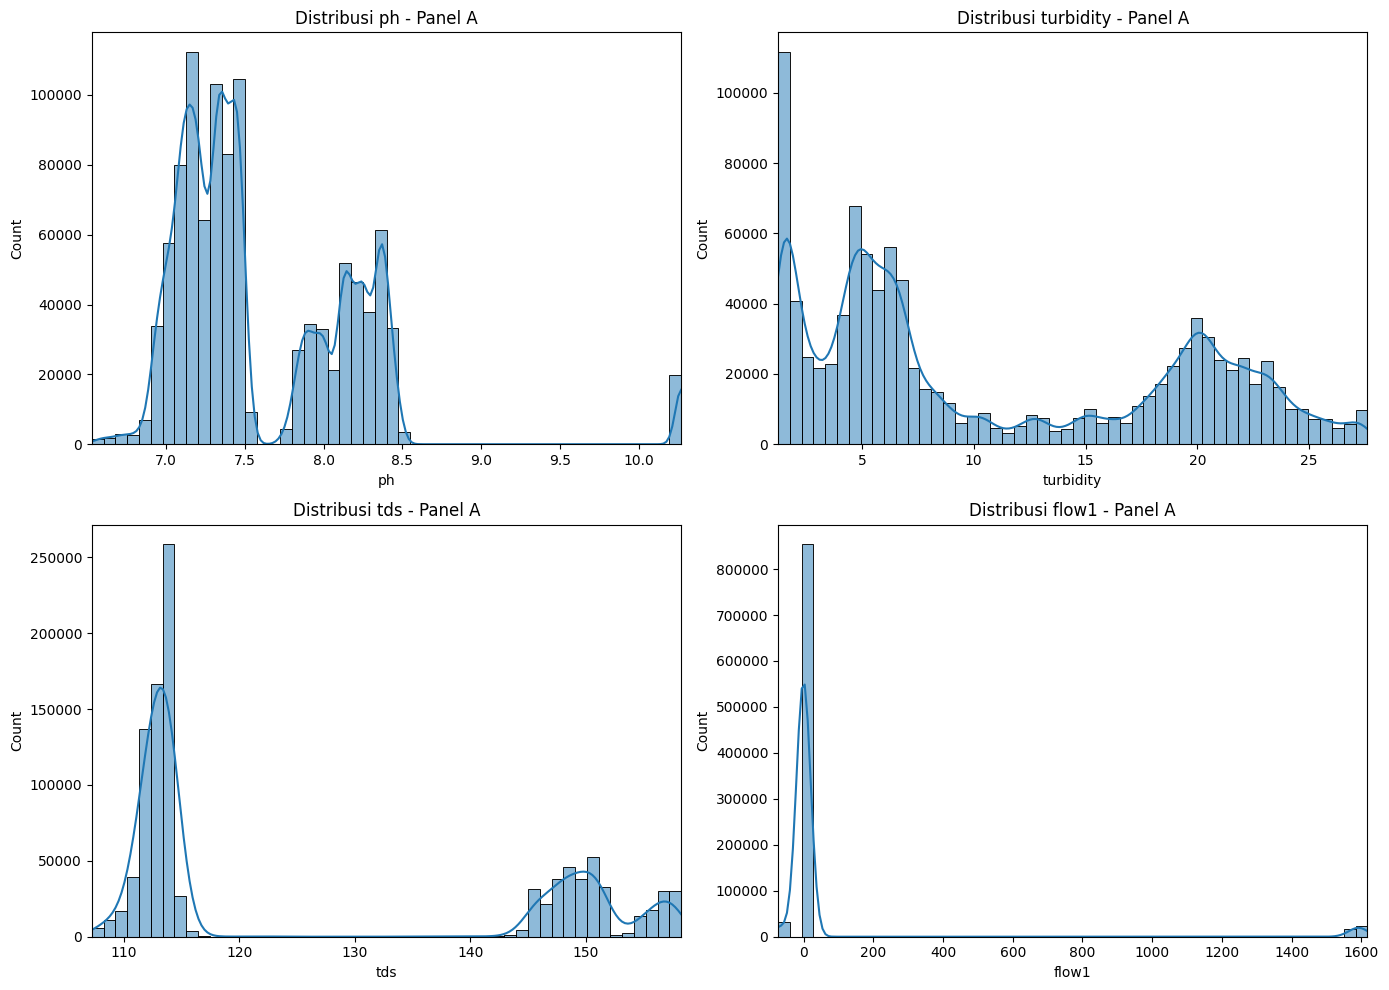

In [11]:
features_A = ['ph', 'turbidity', 'tds', 'flow1']

plt.figure(figsize=(14, 10))
for i, col in enumerate(features_A, 1):
    plt.subplot(2, 2, i)
    data = panelA[col].dropna()
    xmin = data.quantile(0.01)
    xmax = data.quantile(0.99)
    sns.histplot(data[(data >= xmin) & (data <= xmax)], bins=50, kde=True)
    plt.title(f'Distribusi {col} - Panel A')
    plt.xlim(xmin, xmax)
plt.tight_layout()
plt.show()

### Panel B (Setelah Filtrasi)

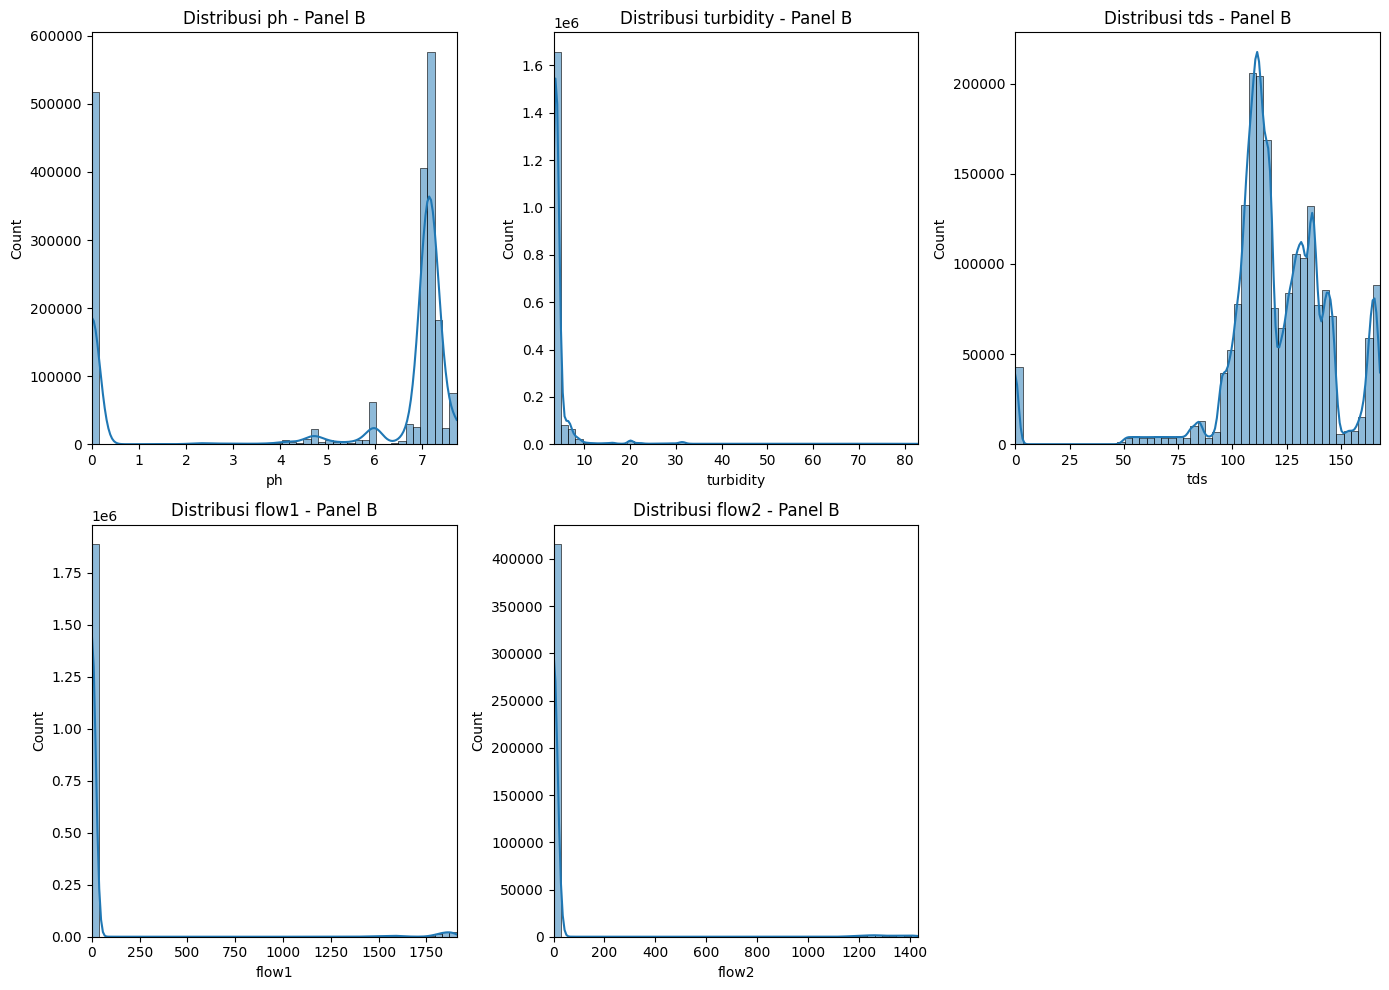

In [12]:
features_B = ['ph', 'turbidity', 'tds', 'flow1', 'flow2']

plt.figure(figsize=(14, 10))
for i, col in enumerate(features_B, 1):
    plt.subplot(2, 3, i)
    data = panelB[col].dropna()
    xmin = data.quantile(0.01)
    xmax = data.quantile(0.99)
    sns.histplot(data[(data >= xmin) & (data <= xmax)], bins=50, kde=True)
    plt.title(f'Distribusi {col} - Panel B')
    plt.xlim(xmin, xmax)
plt.tight_layout()
plt.show()

## Check Missing Values

### Panel A (Sebelum Filtrasi)

In [13]:
missing_count_A = panelA.isnull().sum()
missing_percent_A = (missing_count_A / len(panelA)) * 100

missing_A = pd.DataFrame({
    "Missing_Count": missing_count_A,
    "Missing_Percent (%)": missing_percent_A.round(2)
})

missing_A

,Missing_Count,Missing_Percent (%)
id,0,0.00
timestamp,0,0.00
flow1,108591,10.36
turbidity,0,0.00
ph,0,0.00
tds,0,0.00
createdAt,0,0.00
updatedAt,0,0.00


### Panel B (Setelah Filtrasi)

In [14]:
missing_count_B = panelB.isnull().sum()
missing_percent_B = (missing_count_B / len(panelB)) * 100

missing_B = pd.DataFrame({
    "Missing_Count": missing_count_B,
    "Missing_Percent (%)": missing_percent_B.round(2)
})

missing_B

,Missing_Count,Missing_Percent (%)
id,0,0.00
timestamp,0,0.00
flow1,0,0.00
turbidity,0,0.00
ph,0,0.00
tds,0,0.00
createdAt,0,0.00
updatedAt,0,0.00
flow2,1562061,78.36


## Duplicate Values Check

### Panel A (Sebelum Filtrasi)

In [15]:
duplicates_count_A = panelA.duplicated().sum()
duplicates_percent_A = (duplicates_count_A / len(panelA)) * 100

pd.DataFrame({
    "Duplicates_Count": [duplicates_count_A],
    "Duplicates_Percent (%)": [duplicates_percent_A.round(2)]
})


,Duplicates_Count,Duplicates_Percent (%)
0,0,0.0


### Panel B (Setelah Filtrasi)

In [16]:
duplicates_count_B = panelB.duplicated().sum()
duplicates_percent_B = (duplicates_count_B / len(panelB)) * 100

pd.DataFrame({
    "Duplicates_Count": [duplicates_count_B],
    "Duplicates_Percent (%)": [duplicates_percent_B.round(2)]
})


,Duplicates_Count,Duplicates_Percent (%)
0,0,0.0


## Negative Values Sensor Check 

### Panel A (Sebelum Filtrasi)

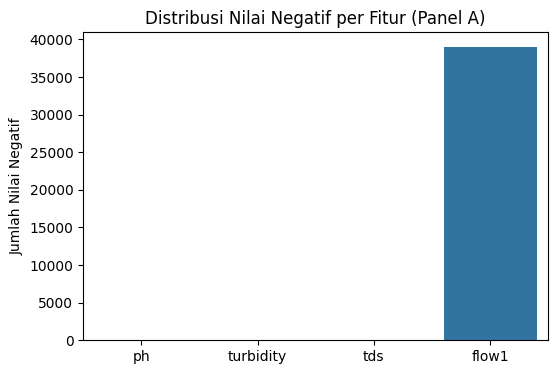

In [17]:
neg_counts = [(col, (panelA[col] < 0).sum()) for col in features_A]
cols, counts = zip(*neg_counts)

plt.figure(figsize=(6,4))
sns.barplot(x=list(cols), y=list(counts))
plt.ylabel('Jumlah Nilai Negatif')
plt.title('Distribusi Nilai Negatif per Fitur (Panel A)')
plt.show()

### Panel B (Setelah Filtrasi)

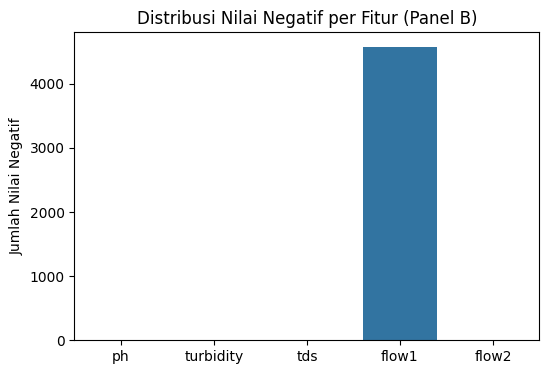

In [18]:
neg_counts = [(col, (panelB[col] < 0).sum()) for col in features_B]
cols, counts = zip(*neg_counts)

plt.figure(figsize=(6,4))
sns.barplot(x=list(cols), y=list(counts))
plt.ylabel('Jumlah Nilai Negatif')
plt.title('Distribusi Nilai Negatif per Fitur (Panel B)')
plt.show()

## Outliers Check

### Panel A (Sebelum Filtrasi)

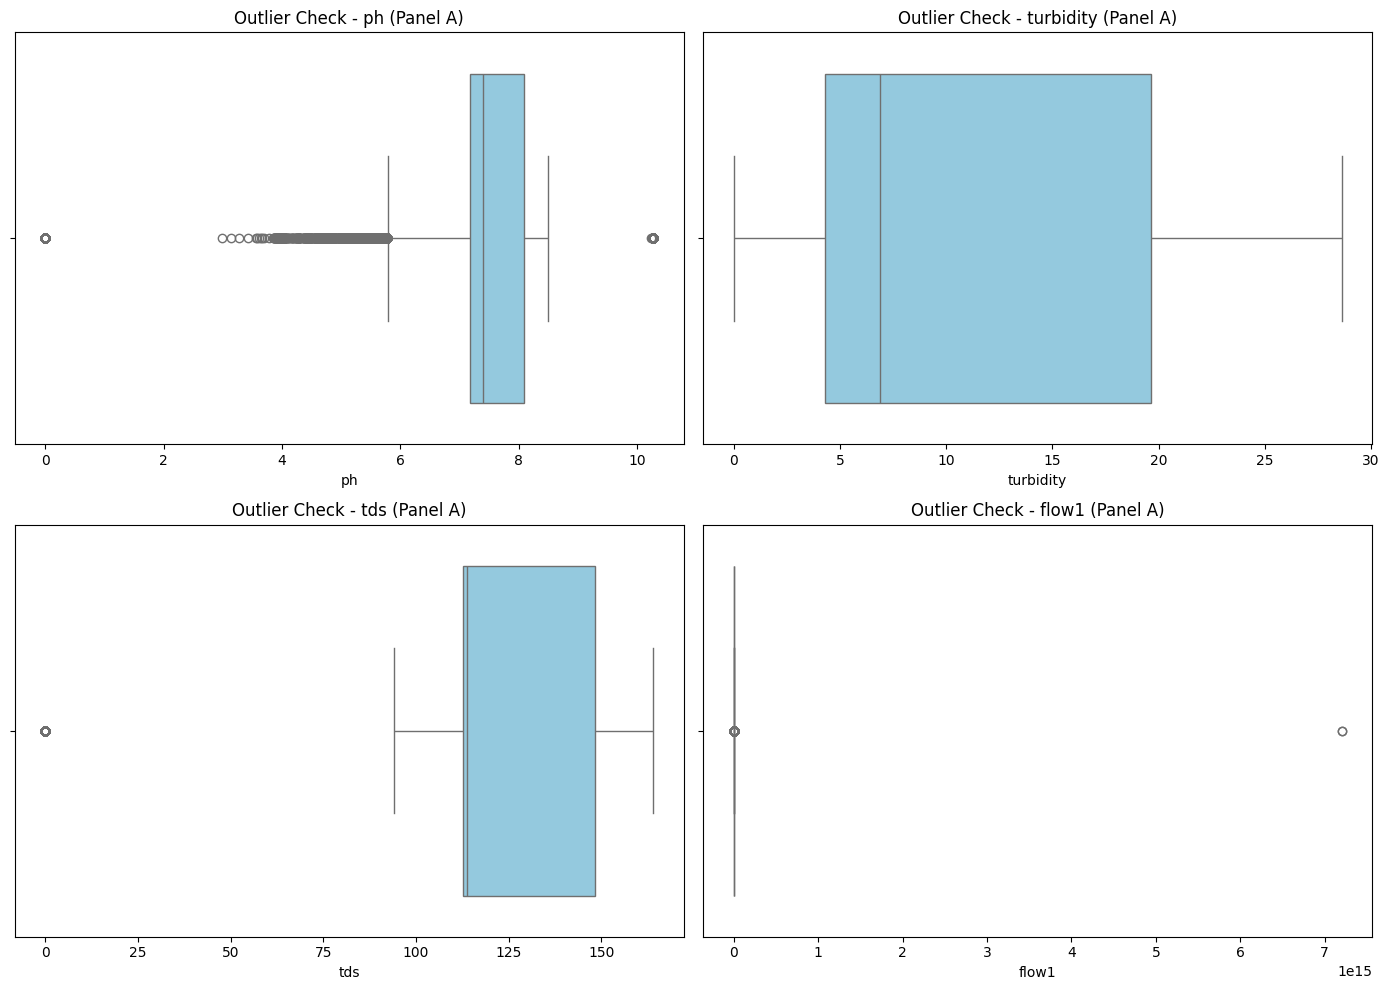

In [19]:
features_A = ['ph', 'turbidity', 'tds', 'flow1']

plt.figure(figsize=(14, 10))

for i, col in enumerate(features_A, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=panelA[col], color='skyblue')
    plt.title(f'Outlier Check - {col} (Panel A)')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

### Panel B (Setelah Filtrasi)

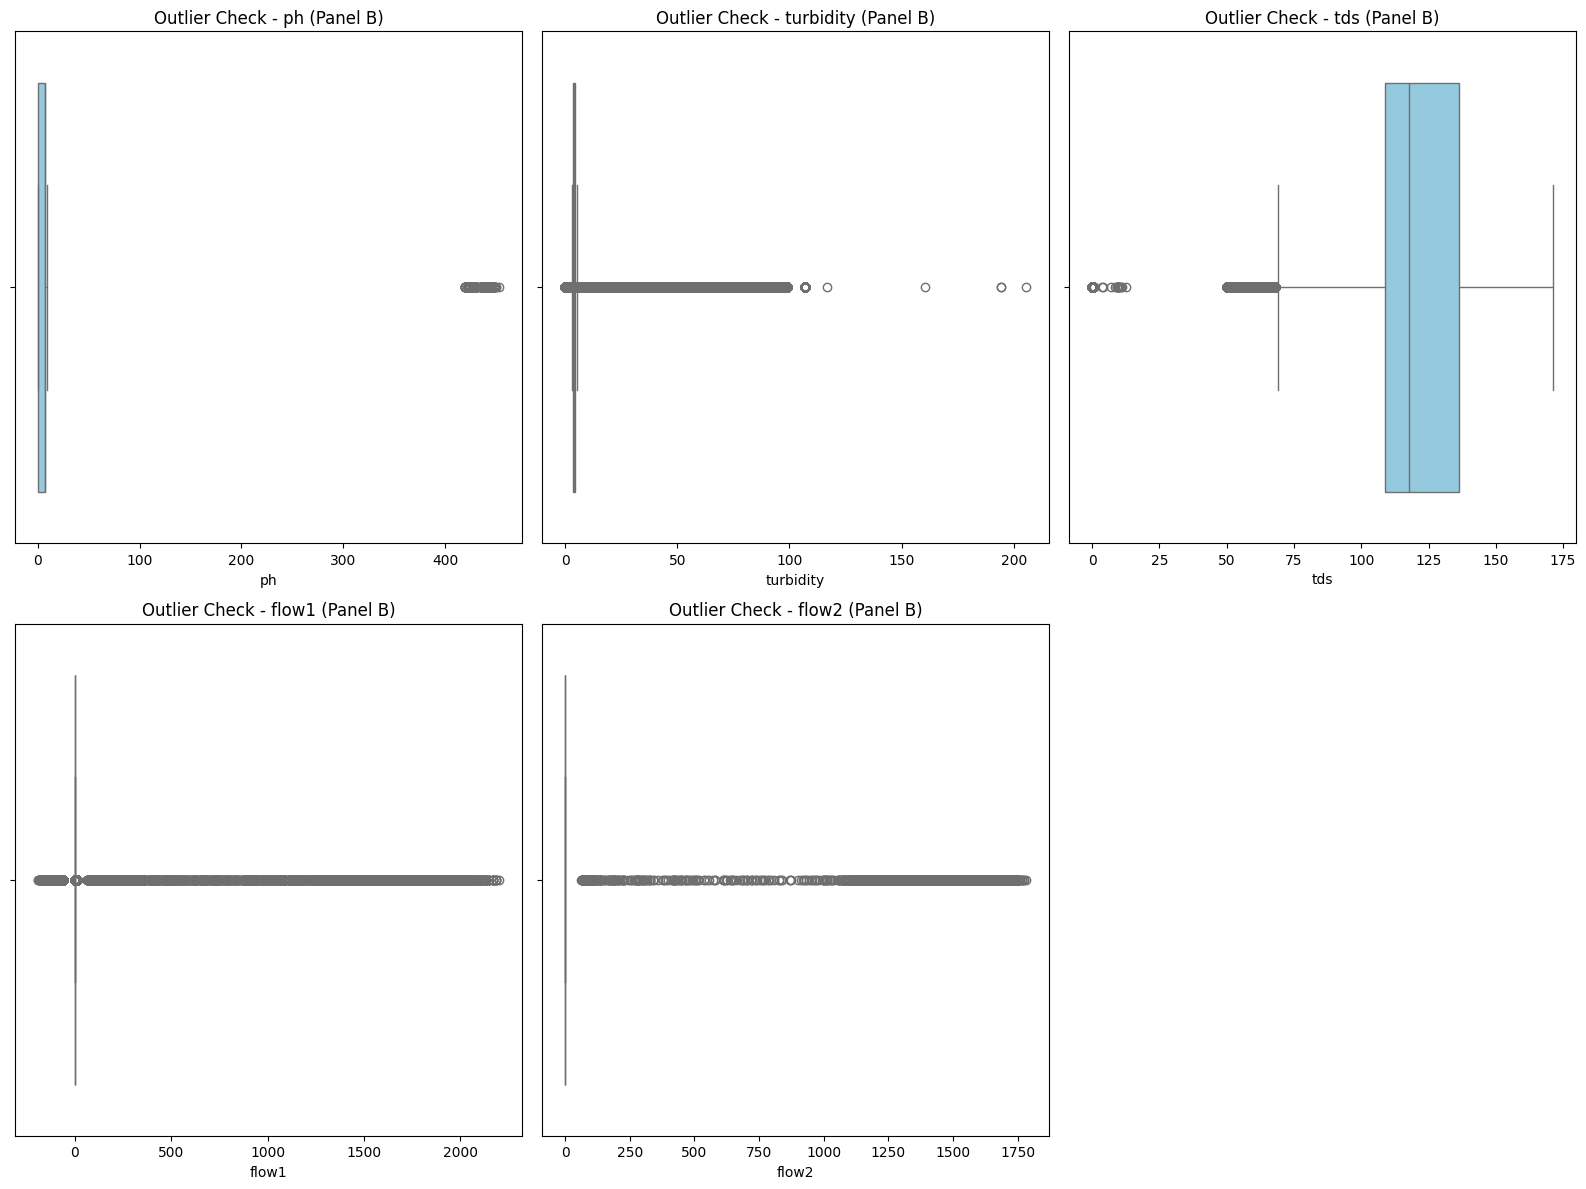

In [20]:
features_B = ['ph', 'turbidity', 'tds', 'flow1', 'flow2']

plt.figure(figsize=(16, 12))

for i, col in enumerate(features_B, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=panelB[col], color='skyblue')
    plt.title(f'Outlier Check - {col} (Panel B)')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

## Heatmap Correlation

### Panel A (Sebelum Filtrasi)

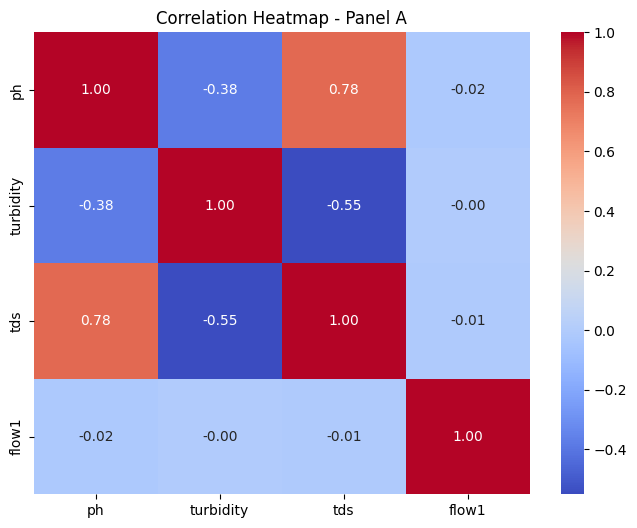

In [21]:
plt.figure(figsize=(8, 6))
corr_A = panelA[features_A].corr()
sns.heatmap(corr_A, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Panel A')
plt.show()

### Panel B (Setelah Filtrasi)

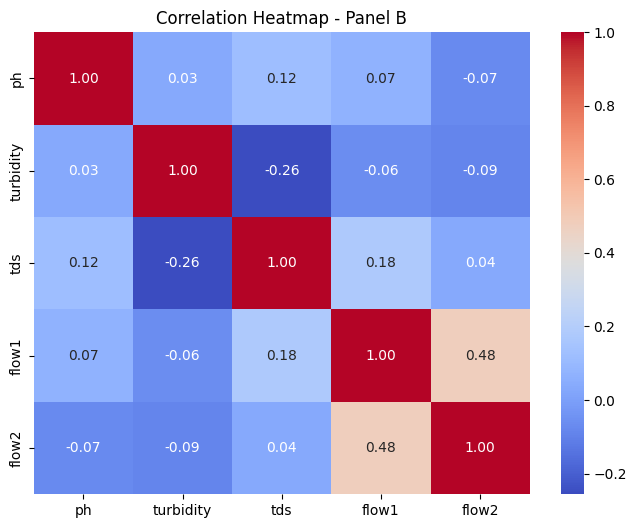

In [22]:
plt.figure(figsize=(8, 6))
corr_B = panelB[features_B].corr()
sns.heatmap(corr_B, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Panel B')
plt.show()

# **Data Preparation**

## Handling Missing Values

### Panel A (Sebelum Filtrasi)

Saya menangani missing value pada Panel A dan Panel B menggunakan interpolasi karena kedua kolom flow (flow1 dan flow2) merupakan data sensor yang berubah secara kontinu mengikuti waktu. Pada Panel A, saya menerapkan interpolasi linear setelah timestamp diurutkan, lalu menambahkan forward–backward fill untuk memastikan tidak ada gap di awal maupun akhir data. <br><br> Sementara itu, Panel B memiliki missing value yang jauh lebih besar pada flow2 (78%), sehingga saya menggunakan interpolasi berbasis waktu (time interpolation) agar estimasi nilai mengikuti pola temporal sensor secara lebih alami. Pendekatan ini menjaga kontinuitas sinyal debit dan menghasilkan imputasi yang lebih realistis dibanding metode statistik sederhana seperti mean atau median.

In [23]:
panelA['timestamp'] = pd.to_datetime(panelA['timestamp'], errors='coerce')
panelA = panelA.sort_values('timestamp')
panelA['flow1'] = panelA['flow1'].interpolate(method='linear')
panelA['flow1'] = panelA['flow1'].ffill().bfill()

In [24]:
missing_count_A_after = panelA.isnull().sum()
missing_percent_A_after = (missing_count_A_after / len(panelA)) * 100

missing_A_after = pd.DataFrame({
    "Missing_Count": missing_count_A_after,
    "Missing_Percent (%)": missing_percent_A_after.round(2)
})

missing_A_after

,Missing_Count,Missing_Percent (%)
id,0,0.0
timestamp,0,0.0
flow1,0,0.0
turbidity,0,0.0
ph,0,0.0
tds,0,0.0
createdAt,0,0.0
updatedAt,0,0.0


### Panel B (Setelah Filtrasi)

In [25]:
panelB['timestamp'] = pd.to_datetime(panelB['timestamp'], errors='coerce')
panelB = panelB.set_index('timestamp')
panelB['flow2'] = panelB['flow2'].interpolate(method='time').ffill().bfill()
panelB = panelB.reset_index()

In [26]:
missing_count_B_after = panelB.isnull().sum()
missing_percent_B_after = (missing_count_B_after / len(panelB)) * 100

missing_B_after = pd.DataFrame({
    "Missing_Count": missing_count_B_after,
    "Missing_Percent (%)": missing_percent_B_after.round(2)
})

missing_B_after

,Missing_Count,Missing_Percent (%)
timestamp,0,0.0
id,0,0.0
flow1,0,0.0
turbidity,0,0.0
ph,0,0.0
tds,0,0.0
createdAt,0,0.0
updatedAt,0,0.0
flow2,0,0.0


## Handling Duplicate Values

### Panel A (Sebelum Filtrasi)

In [27]:
panelA = panelA.drop_duplicates()

duplicates_count_A_after = panelA.duplicated().sum()
duplicates_percent_A_after = (duplicates_count_A_after / len(panelA)) * 100

pd.DataFrame({
    "Duplicates_Count": [duplicates_count_A_after],
    "Duplicates_Percent (%)": [duplicates_percent_A_after.round(2)]
})


,Duplicates_Count,Duplicates_Percent (%)
0,0,0.0


### Panel B (Setelah Filtrasi)

In [28]:
panelB = panelB.drop_duplicates()

duplicates_count_B_after = panelB.duplicated().sum()
duplicates_percent_B_after = (duplicates_count_B_after / len(panelB)) * 100

pd.DataFrame({
    "Duplicates_Count": [duplicates_count_B_after],
    "Duplicates_Percent (%)": [duplicates_percent_B_after.round(2)]
})


,Duplicates_Count,Duplicates_Percent (%)
0,0,0.0


## Handling Negative Values

### Panel A (Sebelum Filtrasi)

In [29]:
panelA['timestamp'] = pd.to_datetime(panelA['timestamp'], errors='coerce')
panelA = panelA.set_index('timestamp')
panelA['flow1'] = panelA['flow1'].mask(panelA['flow1'] < 0)
panelA['flow1'] = panelA['flow1'].interpolate(method='time').ffill().bfill()
panelA = panelA.reset_index()

### Panel B (Setelah Filtrasi)

In [30]:
panelB['timestamp'] = pd.to_datetime(panelB['timestamp'], errors='coerce')
panelB = panelB.set_index('timestamp')
panelB['flow1'] = panelB['flow1'].mask(panelB['flow1'] < 0)
panelB['flow1'] = panelB['flow1'].interpolate(method='time').ffill().bfill()
panelB = panelB.reset_index()

## Feature Engineering

### Label Target (quality_label)

In [31]:
def assign_quality_label(df):
    
    cond_cokelat = (df['ph'] < 5.0) | (df['ph'] > 9.5) | (df['turbidity'] > 30) | (df['tds'] > 1500)
    
    cond_orange = (~cond_cokelat) & (
        ((df['ph'] >= 5.0) & (df['ph'] < 6.0)) |
        ((df['ph'] >= 8.5) & (df['ph'] <= 9.5)) |
        ((df['turbidity'] >= 15) & (df['turbidity'] <= 30)) |
        ((df['tds'] >= 800) & (df['tds'] <= 1500))
    )
    
    cond_biru = (~cond_cokelat & ~cond_orange) & (
        ((df['ph'] >= 6.0) & (df['ph'] < 6.5)) |
        ((df['ph'] >= 8.0) & (df['ph'] < 8.5)) |
        ((df['turbidity'] >= 5) & (df['turbidity'] < 15)) |
        ((df['tds'] >= 500) & (df['tds'] < 800))
    )
    
    cond_putih = (~cond_cokelat & ~cond_orange & ~cond_biru) & (
        (df['ph'] >= 6.5) & (df['ph'] <= 8.0) &
        (df['turbidity'] < 5) &
        (df['tds'] < 500)
    )

    df['quality_label'] = np.where(cond_cokelat, "Cokelat",
                             np.where(cond_orange, "Orange",
                             np.where(cond_biru, "Biru",
                             np.where(cond_putih, "Putih", "Tidak Terkategori"))))
    
    return df

panelA = assign_quality_label(panelA)
panelB = assign_quality_label(panelB)

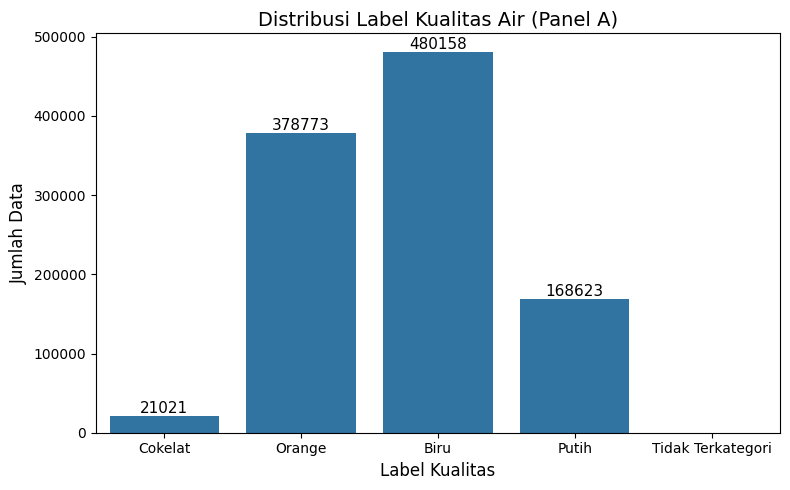

In [32]:
labels = ["Cokelat", "Orange", "Biru", "Putih", "Tidak Terkategori"]

plt.figure(figsize=(8,5))
ax = sns.countplot(
    x='quality_label', 
    data=panelA, 
    order=labels
)

plt.title('Distribusi Label Kualitas Air (Panel A)', fontsize=14)
plt.xlabel('Label Kualitas', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)
plt.xticks(rotation=0)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            int(height), 
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom', fontsize=11, color='black'
        )

plt.tight_layout()
plt.show()


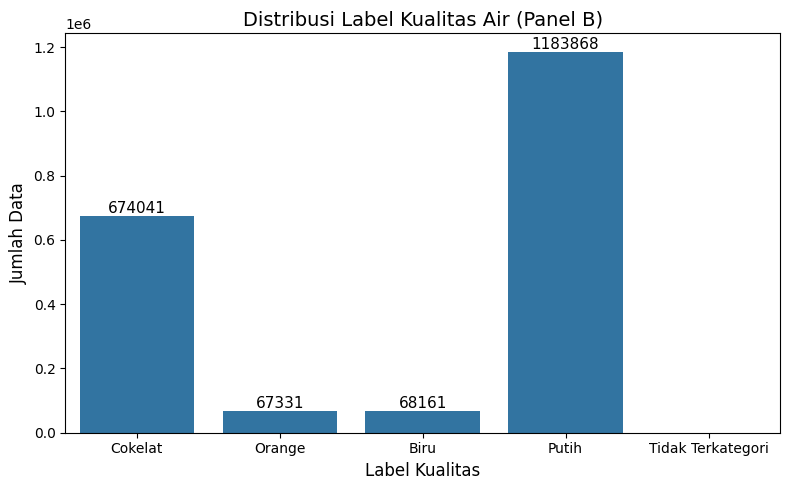

In [33]:
labels = ["Cokelat", "Orange", "Biru", "Putih", "Tidak Terkategori"]

plt.figure(figsize=(8,5))
ax = sns.countplot(
    x='quality_label', 
    data=panelB, 
    order=labels
)

plt.title('Distribusi Label Kualitas Air (Panel B)', fontsize=14)
plt.xlabel('Label Kualitas', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)
plt.xticks(rotation=0)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            int(height), 
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom', fontsize=11, color='black'
        )

plt.tight_layout()
plt.show()


In [34]:
panelA.head()

,timestamp,id,flow1,turbidity,ph,tds,createdAt,updatedAt,quality_label
0,1970-01-01 07:00:00,450992,0.0,4.563518,7.98,156.8765,2/21/2025 21:42,2/21/2025 21:42,Putih
1,1970-01-01 07:00:00,1278060,0.0,21.569630,7.50,112.7450,4/22/2025 22:35,4/22/2025 22:35,Orange
2,1970-01-01 07:00:00,1278059,0.0,21.568650,7.50,112.7399,4/22/2025 22:34,4/22/2025 22:34,Orange
3,1970-01-01 07:00:00,1278058,0.0,21.567870,7.50,112.7356,4/22/2025 22:34,4/22/2025 22:34,Orange
4,1970-01-01 07:00:00,1278057,0.0,21.567520,0.00,112.7371,4/22/2025 22:34,4/22/2025 22:34,Cokelat


In [35]:
panelB.head()

,timestamp,id,flow1,turbidity,ph,tds,createdAt,updatedAt,flow2,quality_label
0,1970-01-28 03:53:42.642000+07:00,1759848,0.0,3.364695,7.25,143.8033,2025-05-14 08:26:01.557 +0700,2025-05-14 08:26:01.557 +0700,0.0,Putih
1,1970-01-28 03:54:21.085000+07:00,1759855,0.0,3.366403,7.25,143.7931,2025-05-14 08:26:39.996 +0700,2025-05-14 08:26:39.996 +0700,0.0,Putih
2,1970-01-05 01:45:13.159000+07:00,1831211,0.0,3.399860,7.33,161.7926,2025-05-25 03:35:06.020 +0700,2025-05-25 03:35:06.020 +0700,0.0,Putih
3,1970-01-05 01:45:18.650000+07:00,1831212,0.0,3.401232,7.33,161.7500,2025-05-25 03:35:11.516 +0700,2025-05-25 03:35:11.516 +0700,0.0,Putih
4,1970-01-05 01:45:24.141000+07:00,1831213,0.0,3.401707,7.32,161.7500,2025-05-25 03:35:17.005 +0700,2025-05-25 03:35:17.005 +0700,0.0,Putih


## Encoding

### Panel A (Sebelum Filtrasi)

In [36]:
le = LabelEncoder()
panelA['quality_label_enc_A'] = le.fit_transform(panelA['quality_label'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Biru': np.int64(0), 'Cokelat': np.int64(1), 'Orange': np.int64(2), 'Putih': np.int64(3)}


In [37]:
panelA.head()

,timestamp,id,flow1,turbidity,ph,tds,createdAt,updatedAt,quality_label,quality_label_enc_A
0,1970-01-01 07:00:00,450992,0.0,4.563518,7.98,156.8765,2/21/2025 21:42,2/21/2025 21:42,Putih,3
1,1970-01-01 07:00:00,1278060,0.0,21.569630,7.50,112.7450,4/22/2025 22:35,4/22/2025 22:35,Orange,2
2,1970-01-01 07:00:00,1278059,0.0,21.568650,7.50,112.7399,4/22/2025 22:34,4/22/2025 22:34,Orange,2
3,1970-01-01 07:00:00,1278058,0.0,21.567870,7.50,112.7356,4/22/2025 22:34,4/22/2025 22:34,Orange,2
4,1970-01-01 07:00:00,1278057,0.0,21.567520,0.00,112.7371,4/22/2025 22:34,4/22/2025 22:34,Cokelat,1


### Panel B (Setelah Filtrasi)

In [38]:
le = LabelEncoder()
panelB['quality_label_enc_B'] = le.fit_transform(panelB['quality_label'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Biru': np.int64(0), 'Cokelat': np.int64(1), 'Orange': np.int64(2), 'Putih': np.int64(3)}


In [39]:
panelB.head()

,timestamp,id,flow1,turbidity,ph,tds,createdAt,updatedAt,flow2,quality_label,quality_label_enc_B
0,1970-01-28 03:53:42.642000+07:00,1759848,0.0,3.364695,7.25,143.8033,2025-05-14 08:26:01.557 +0700,2025-05-14 08:26:01.557 +0700,0.0,Putih,3
1,1970-01-28 03:54:21.085000+07:00,1759855,0.0,3.366403,7.25,143.7931,2025-05-14 08:26:39.996 +0700,2025-05-14 08:26:39.996 +0700,0.0,Putih,3
2,1970-01-05 01:45:13.159000+07:00,1831211,0.0,3.399860,7.33,161.7926,2025-05-25 03:35:06.020 +0700,2025-05-25 03:35:06.020 +0700,0.0,Putih,3
3,1970-01-05 01:45:18.650000+07:00,1831212,0.0,3.401232,7.33,161.7500,2025-05-25 03:35:11.516 +0700,2025-05-25 03:35:11.516 +0700,0.0,Putih,3
4,1970-01-05 01:45:24.141000+07:00,1831213,0.0,3.401707,7.32,161.7500,2025-05-25 03:35:17.005 +0700,2025-05-25 03:35:17.005 +0700,0.0,Putih,3


## Feature Selection

In [40]:
num_features_A = [
    'ph', 'turbidity', 'tds', 'flow1',
]

In [41]:
num_features_B = [
    'flow1', 'turbidity', 'ph', 'tds', 'flow2',
]

# **Splitting Dataset**

Saya membagi data menjadi tiga set, yaitu `train, validation, dan test` dengan rasio `80:10:10`. Pembagian ini bertujuan agar model dapat dilatih, divalidasi, dan diuji secara optimal sehingga hasil evaluasi lebih akurat dan model tidak overfitting.

### Panel A (Sebelum Filtrasi)

In [42]:
X = panelA[num_features_A]
y = panelA['quality_label_enc_A']

X_train_A, X_temp_A, y_train_A, y_temp_A = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_val_A, X_test_A, y_val_A, y_test_A = train_test_split(
    X_temp_A, y_temp_A, test_size=0.5, random_state=42, stratify=y_temp_A
)

### Panel B (Setelah Filtrasi)

In [43]:
X = panelB[num_features_B]
y = panelB['quality_label_enc_B']

X_train_B, X_temp_B, y_train_B, y_temp_B = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_val_B, X_test_B, y_val_B, y_test_B = train_test_split(
    X_temp_B, y_temp_B, test_size=0.5, random_state=42, stratify=y_temp_B
)

# **Normalization**

### Panel A (Sebelum Filtrasi)

In [44]:
scaler_A = StandardScaler()
X_train_A_scaled = scaler_A.fit_transform(X_train_A)
X_val_A_scaled = scaler_A.transform(X_val_A)
X_test_A_scaled = scaler_A.transform(X_test_A)

In [45]:
pd.DataFrame(X_train_A_scaled, columns=num_features_A).head()

,ph,turbidity,tds,flow1
0,-0.857381,-0.543450,-0.745385,-0.002398
1,-0.766853,-0.337528,-0.698012,-0.002398
2,0.892815,-0.521907,1.326341,-0.002398
3,0.636320,-0.719358,1.942664,-0.002398
4,-0.585799,0.175903,-0.658766,-0.002398


### Panel B (Setelah Filtrasi)

In [46]:
scaler_B = StandardScaler()
X_train_B_scaled = scaler_B.fit_transform(X_train_B)
X_val_B_scaled = scaler_B.transform(X_val_B)
X_test_B_scaled = scaler_B.transform(X_test_B)

In [47]:
pd.DataFrame(X_train_B_scaled, columns=num_features_B).head()

,flow1,turbidity,ph,tds,flow2
0,-0.232797,-0.293974,0.321462,1.633775,-0.23326
1,-0.232797,-0.261518,0.276915,0.384206,-0.23326
2,-0.232797,-0.174328,0.382906,-0.677126,-0.23326
3,-0.232797,-0.250002,-0.806033,-0.185150,-0.23326
4,-0.232797,-0.260797,0.292276,0.765663,-0.23326


# **Modeling**

### Panel A (Sebelum Filtrasi)

#### Logistic Regression

In [48]:
logreg_A = LogisticRegression(max_iter=200, random_state=42)
logreg_A.fit(X_train_A_scaled, y_train_A)
y_pred_logreg_A = logreg_A.predict(X_val_A_scaled)

#### Decision Tree

In [49]:
dt_A = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_A.fit(X_train_A_scaled, y_train_A)
y_pred_dt_A = dt_A.predict(X_val_A_scaled)

#### Random Forest

In [50]:
rf_A = RandomForestClassifier(n_estimators=2, random_state=42)
rf_A.fit(X_train_A_scaled, y_train_A)
y_pred_rf_A = rf_A.predict(X_val_A_scaled)

#### Support Vector Machine

In [51]:
svm_A = SVC(kernel='linear', C=0.1, max_iter=2000, random_state=42)
svm_A.fit(X_train_A_scaled, y_train_A)
y_pred_svm_A = svm_A.predict(X_val_A_scaled)

d:\Coolyeah\Dicoding\Submission_Dicoding\ml_ops\envs\urbansolv\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


### Panel B (Setelah Filtrasi)

#### Logistic Regression

In [52]:
logreg_B = LogisticRegression(max_iter=200, random_state=42)
logreg_B.fit(X_train_B_scaled, y_train_B)
y_pred_logreg_B = logreg_B.predict(X_val_B_scaled)

#### Decision Tree

In [53]:
dt_B = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_B.fit(X_train_B_scaled, y_train_B)
y_pred_dt_B = dt_B.predict(X_val_B_scaled)

#### Random Forest

In [54]:
rf_B = RandomForestClassifier(n_estimators=2, random_state=42)
rf_B.fit(X_train_B_scaled, y_train_B)
y_pred_rf_B = rf_B.predict(X_val_B_scaled)

#### Support Vector Machine

In [55]:
svm_B = SVC(kernel='linear', C=0.1, max_iter=2000, random_state=42)
svm_B.fit(X_train_B_scaled, y_train_B)
y_pred_svm_B = svm_B.predict(X_val_B_scaled)

d:\Coolyeah\Dicoding\Submission_Dicoding\ml_ops\envs\urbansolv\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


# **Evaluation**

### Panel A (Sebelum Filtrasi)

#### Logistic Regression

In [56]:
y_pred_logreg_A_train = logreg_A.predict(X_train_A_scaled)
y_pred_logreg_A_val = logreg_A.predict(X_val_A_scaled)
y_pred_logreg_A_test = logreg_A.predict(X_test_A_scaled)

acc_logreg_A_train = accuracy_score(y_train_A, y_pred_logreg_A_train)
acc_logreg_A_val = accuracy_score(y_val_A, y_pred_logreg_A_val)
acc_logreg_A_test = accuracy_score(y_test_A, y_pred_logreg_A_test)

print(f"Accuracy Logistic Regression (Train): {acc_logreg_A_train:.4f}")
print(f"Accuracy Logistic Regression (Validation): {acc_logreg_A_val:.4f}")
print(f"Accuracy Logistic Regression (Test): {acc_logreg_A_test:.4f}")

Accuracy Logistic Regression (Train): 0.9586
Accuracy Logistic Regression (Validation): 0.9590
Accuracy Logistic Regression (Test): 0.9590


In [57]:
print("=== Evaluation on Test Set ===")
print(classification_report(y_test_A, y_pred_logreg_A_test, target_names=le.classes_))

=== Evaluation on Test Set ===
              precision    recall  f1-score   support

        Biru       0.94      0.98      0.96     48016
     Cokelat       0.91      0.94      0.93      2102
      Orange       0.99      1.00      1.00     37878
       Putih       0.95      0.81      0.88     16862

    accuracy                           0.96    104858
   macro avg       0.95      0.93      0.94    104858
weighted avg       0.96      0.96      0.96    104858



In [58]:
cm_logreg = confusion_matrix(y_test_A, y_pred_logreg_A_test)
print("Confusion Matrix (array):")
print(cm_logreg)

Confusion Matrix (array):
[[47069    55   231   661]
 [    0  1983    17   102]
 [   92     0 37773    13]
 [ 2990   140     0 13732]]


<Figure size 500x400 with 0 Axes>

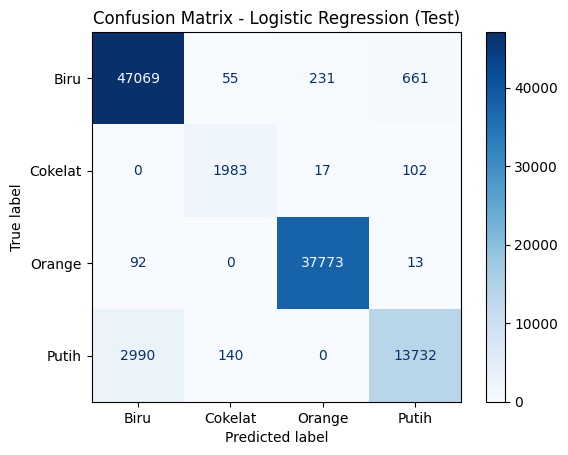

In [59]:
cm_logreg = confusion_matrix(y_test_A, y_pred_logreg_A_test)
label_asli = le.classes_
plt.figure(figsize=(5,4))
ConfusionMatrixDisplay(cm_logreg, display_labels=label_asli).plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression (Test)")
plt.show()

#### Decision Tree

In [60]:
y_pred_dt_A_train = dt_A.predict(X_train_A_scaled)
y_pred_dt_A_val = dt_A.predict(X_val_A_scaled)
y_pred_dt_A_test = dt_A.predict(X_test_A_scaled)

acc_dt_A_train = accuracy_score(y_train_A, y_pred_dt_A_train)
acc_dt_A_val = accuracy_score(y_val_A, y_pred_dt_A_val)
acc_dt_A_test = accuracy_score(y_test_A, y_pred_dt_A_test)

print(f"Accuracy Decision Tree (Train): {acc_dt_A_train:.4f}")
print(f"Accuracy Decision Tree (Validation): {acc_dt_A_val:.4f}")
print(f"Accuracy Decision Tree (Test): {acc_dt_A_test:.4f}")

Accuracy Decision Tree (Train): 0.9617
Accuracy Decision Tree (Validation): 0.9622
Accuracy Decision Tree (Test): 0.9618


In [61]:
print("=== Evaluation on Test Set ===")
print(classification_report(y_test_A, y_pred_dt_A_test, target_names=le.classes_))

=== Evaluation on Test Set ===
              precision    recall  f1-score   support

        Biru       0.93      0.99      0.96     48016
     Cokelat       1.00      0.99      1.00      2102
      Orange       1.00      1.00      1.00     37878
       Putih       0.98      0.78      0.87     16862

    accuracy                           0.96    104858
   macro avg       0.98      0.94      0.96    104858
weighted avg       0.96      0.96      0.96    104858



In [62]:
cm_dt = confusion_matrix(y_test_A, y_pred_dt_A_test)
print("Confusion Matrix (array):")
print(cm_dt)

Confusion Matrix (array):
[[47739     0     0   277]
 [    6  2087     7     2]
 [    0     0 37878     0]
 [ 3713     0     0 13149]]


<Figure size 500x400 with 0 Axes>

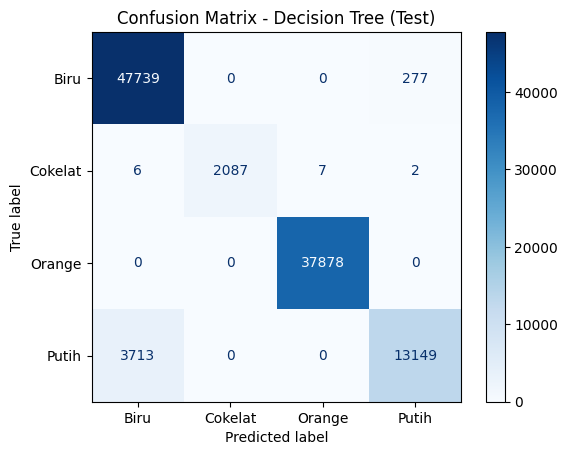

In [63]:
cm_dt = confusion_matrix(y_test_A, y_pred_dt_A_test)
label_asli = le.classes_
plt.figure(figsize=(5,4))
ConfusionMatrixDisplay(cm_dt, display_labels=label_asli).plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree (Test)")
plt.show()

#### Random Forest

In [64]:
y_pred_rf_A_train = rf_A.predict(X_train_A_scaled)
y_pred_rf_A_val = rf_A.predict(X_val_A_scaled)
y_pred_rf_A_test = rf_A.predict(X_test_A_scaled)

acc_rf_A_train = accuracy_score(y_train_A, y_pred_rf_A_train)
acc_rf_A_val = accuracy_score(y_val_A, y_pred_rf_A_val)
acc_rf_A_test = accuracy_score(y_test_A, y_pred_rf_A_test)

print(f"Accuracy Random Forest (Train): {acc_rf_A_train:.4f}")
print(f"Accuracy Random Forest (Validation): {acc_rf_A_val:.4f}")
print(f"Accuracy Random Forest (Test): {acc_rf_A_test:.4f}")

Accuracy Random Forest (Train): 1.0000
Accuracy Random Forest (Validation): 1.0000
Accuracy Random Forest (Test): 1.0000


In [65]:
print("=== Evaluation on Test Set ===")
print(classification_report(y_test_A, y_pred_rf_A_test, target_names=le.classes_))

=== Evaluation on Test Set ===
              precision    recall  f1-score   support

        Biru       1.00      1.00      1.00     48016
     Cokelat       1.00      1.00      1.00      2102
      Orange       1.00      1.00      1.00     37878
       Putih       1.00      1.00      1.00     16862

    accuracy                           1.00    104858
   macro avg       1.00      1.00      1.00    104858
weighted avg       1.00      1.00      1.00    104858



In [66]:
cm_rf = confusion_matrix(y_test_A, y_pred_rf_A_test)
print("Confusion Matrix (array):")
print(cm_rf)

Confusion Matrix (array):
[[48016     0     0     0]
 [    1  2101     0     0]
 [    0     0 37878     0]
 [    2     0     0 16860]]


<Figure size 500x400 with 0 Axes>

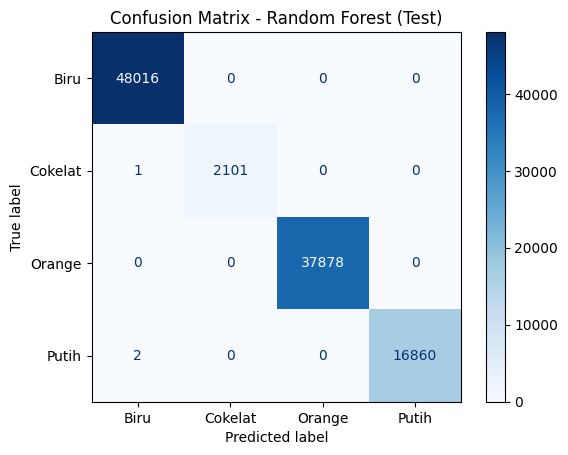

In [67]:
cm_rf = confusion_matrix(y_test_A, y_pred_rf_A_test)
label_asli = le.classes_
plt.figure(figsize=(5,4))
ConfusionMatrixDisplay(cm_rf, display_labels=label_asli).plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Random Forest (Test)")
plt.show()

#### Support Vector Machine

In [68]:
y_pred_svm_A_train = svm_A.predict(X_train_A_scaled)
y_pred_svm_A_val = svm_A.predict(X_val_A_scaled)
y_pred_svm_A_test = svm_A.predict(X_test_A_scaled)

acc_svm_A_train = accuracy_score(y_train_A, y_pred_svm_A_train)
acc_svm_A_val = accuracy_score(y_val_A, y_pred_svm_A_val)
acc_svm_A_test = accuracy_score(y_test_A, y_pred_svm_A_test)

print(f"Accuracy Support Vector Machine (Train): {acc_svm_A_train:.4f}")
print(f"Accuracy Support Vector Machine (Validation): {acc_svm_A_val:.4f}")
print(f"Accuracy Support Vector Machine (Test): {acc_svm_A_test:.4f}")

Accuracy Support Vector Machine (Train): 0.8533
Accuracy Support Vector Machine (Validation): 0.8524
Accuracy Support Vector Machine (Test): 0.8533


In [69]:
print("=== Evaluation on Test Set ===")
print(classification_report(y_test_A, y_pred_svm_A_test, target_names=le.classes_))

=== Evaluation on Test Set ===
              precision    recall  f1-score   support

        Biru       0.89      0.78      0.83     48016
     Cokelat       0.00      0.00      0.00      2102
      Orange       0.87      1.00      0.93     37878
       Putih       0.74      0.85      0.79     16862

    accuracy                           0.85    104858
   macro avg       0.62      0.66      0.64    104858
weighted avg       0.84      0.85      0.84    104858



In [70]:
cm_svm = confusion_matrix(y_test_A, y_pred_svm_A_test)
print("Confusion Matrix (array):")
print(cm_svm)

Confusion Matrix (array):
[[37239    22  5622  5133]
 [ 2064     0    38     0]
 [   13     0 37865     0]
 [ 2494     0     0 14368]]


<Figure size 500x400 with 0 Axes>

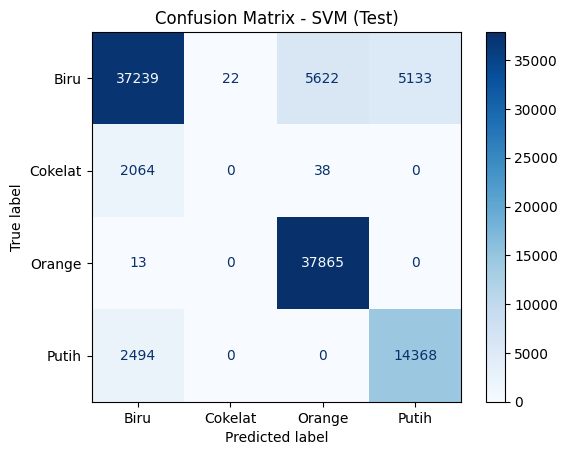

In [71]:
cm_svm = confusion_matrix(y_test_A, y_pred_svm_A_test)
label_asli = le.classes_
plt.figure(figsize=(5,4))
ConfusionMatrixDisplay(cm_svm, display_labels=label_asli).plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - SVM (Test)")
plt.show()

### Panel B (Setelah Filtrasi)

#### Logistic Regression

In [72]:
y_pred_logreg_B_train = logreg_B.predict(X_train_B_scaled)
y_pred_logreg_B_val = logreg_B.predict(X_val_B_scaled)
y_pred_logreg_B_test = logreg_B.predict(X_test_B_scaled)

acc_logreg_B_train = accuracy_score(y_train_B, y_pred_logreg_B_train)
acc_logreg_B_val = accuracy_score(y_val_B, y_pred_logreg_B_val)
acc_logreg_B_test = accuracy_score(y_test_B, y_pred_logreg_B_test)

print(f"Accuracy Logistic Regression (Train): {acc_logreg_B_train:.4f}")
print(f"Accuracy Logistic Regression (Validation): {acc_logreg_B_val:.4f}")
print(f"Accuracy Logistic Regression (Test): {acc_logreg_B_test:.4f}")

Accuracy Logistic Regression (Train): 0.9416
Accuracy Logistic Regression (Validation): 0.9422
Accuracy Logistic Regression (Test): 0.9418


In [73]:
print("=== Evaluation on Test Set ===")
print(classification_report(y_test_B, y_pred_logreg_B_test, target_names=le.classes_))

=== Evaluation on Test Set ===
              precision    recall  f1-score   support

        Biru       1.00      0.72      0.84      6816
     Cokelat       0.93      0.93      0.93     67405
      Orange       0.87      0.29      0.44      6733
       Putih       0.95      1.00      0.97    118387

    accuracy                           0.94    199341
   macro avg       0.94      0.73      0.79    199341
weighted avg       0.94      0.94      0.94    199341



In [74]:
cm_logreg = confusion_matrix(y_test_B, y_pred_logreg_B_test)
print("Confusion Matrix (array):")
print(cm_logreg)

Confusion Matrix (array):
[[  4908   1153    300    455]
 [     0  62473      6   4926]
 [     1   3797   1970    965]
 [     3      0      0 118384]]


<Figure size 500x400 with 0 Axes>

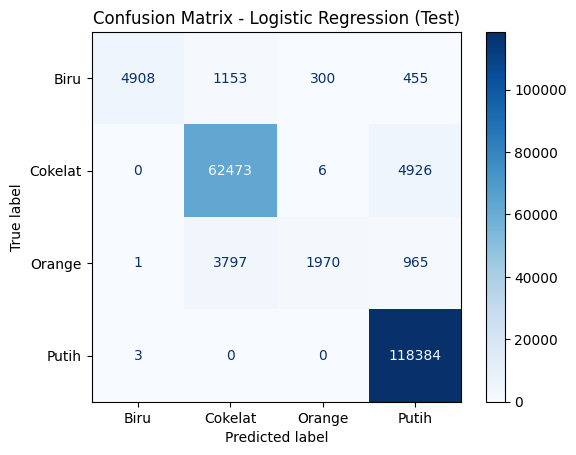

In [75]:
cm_logreg = confusion_matrix(y_test_B, y_pred_logreg_B_test)
label_asli = le.classes_
plt.figure(figsize=(5,4))
ConfusionMatrixDisplay(cm_logreg, display_labels=label_asli).plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression (Test)")
plt.show()

#### Decision Tree

In [76]:
y_pred_dt_B_train = dt_B.predict(X_train_B_scaled)
y_pred_dt_B_val = dt_B.predict(X_val_B_scaled)
y_pred_dt_B_test = dt_B.predict(X_test_B_scaled)

acc_dt_B_train = accuracy_score(y_train_B, y_pred_dt_B_train)
acc_dt_B_val = accuracy_score(y_val_B, y_pred_dt_B_val)
acc_dt_B_test = accuracy_score(y_test_B, y_pred_dt_B_test)
print(f"Accuracy Decision Tree (Train): {acc_dt_B_train:.4f}")
print(f"Accuracy Decision Tree (Validation): {acc_dt_B_val:.4f}")
print(f"Accuracy Decision Tree (Test): {acc_dt_B_test:.4f}")

Accuracy Decision Tree (Train): 0.9879
Accuracy Decision Tree (Validation): 0.9879
Accuracy Decision Tree (Test): 0.9879


In [77]:
print("=== Evaluation on Test Set ===")
print(classification_report(y_test_B, y_pred_dt_B_test, target_names=le.classes_))

=== Evaluation on Test Set ===
              precision    recall  f1-score   support

        Biru       0.74      1.00      0.85      6816
     Cokelat       1.00      1.00      1.00     67405
      Orange       1.00      0.64      0.78      6733
       Putih       1.00      1.00      1.00    118387

    accuracy                           0.99    199341
   macro avg       0.93      0.91      0.91    199341
weighted avg       0.99      0.99      0.99    199341



In [78]:
cm_dt = confusion_matrix(y_test_B, y_pred_dt_B_test)
print("Confusion Matrix (array):")
print(cm_dt)

Confusion Matrix (array):
[[  6816      0      0      0]
 [     0  67405      0      0]
 [  2402      0   4331      0]
 [    13      0      0 118374]]


<Figure size 500x400 with 0 Axes>

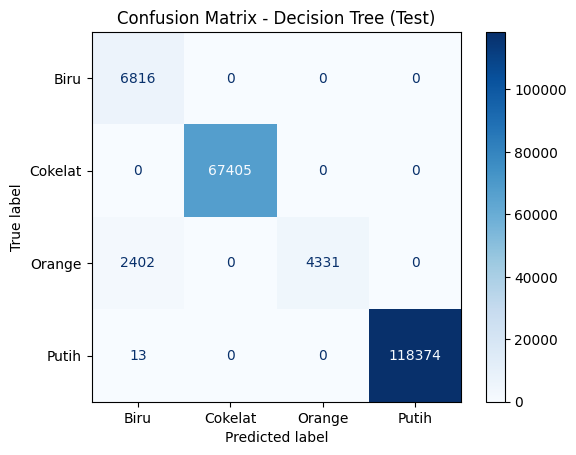

In [79]:
cm_dt = confusion_matrix(y_test_B, y_pred_dt_B_test)
label_asli = le.classes_
plt.figure(figsize=(5,4))
ConfusionMatrixDisplay(cm_dt, display_labels=label_asli).plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree (Test)")
plt.show()

#### Random Forest

In [80]:
y_pred_rf_B_train = rf_B.predict(X_train_B_scaled)
y_pred_rf_B_val = rf_B.predict(X_val_B_scaled)
y_pred_rf_B_test = rf_B.predict(X_test_B_scaled)

acc_rf_B_train = accuracy_score(y_train_B, y_pred_rf_B_train)
acc_rf_B_val = accuracy_score(y_val_B, y_pred_rf_B_val)
acc_rf_B_test = accuracy_score(y_test_B, y_pred_rf_B_test)
print(f"Accuracy Random Forest (Train): {acc_rf_B_train:.4f}")
print(f"Accuracy Random Forest (Validation): {acc_rf_B_val:.4f}")
print(f"Accuracy Random Forest (Test): {acc_rf_B_test:.4f}")

Accuracy Random Forest (Train): 1.0000
Accuracy Random Forest (Validation): 0.9999
Accuracy Random Forest (Test): 0.9999


In [81]:
print("=== Evaluation on Test Set ===")
print(classification_report(y_test_B, y_pred_rf_B_test, target_names=le.classes_))

=== Evaluation on Test Set ===
              precision    recall  f1-score   support

        Biru       1.00      1.00      1.00      6816
     Cokelat       1.00      1.00      1.00     67405
      Orange       1.00      1.00      1.00      6733
       Putih       1.00      1.00      1.00    118387

    accuracy                           1.00    199341
   macro avg       1.00      1.00      1.00    199341
weighted avg       1.00      1.00      1.00    199341



In [82]:
cm_rf = confusion_matrix(y_test_B, y_pred_rf_B_test)
print("Confusion Matrix (array):")
print(cm_rf)

Confusion Matrix (array):
[[  6816      0      0      0]
 [     0  67405      0      0]
 [     3      4   6726      0]
 [     2      0      4 118381]]


<Figure size 500x400 with 0 Axes>

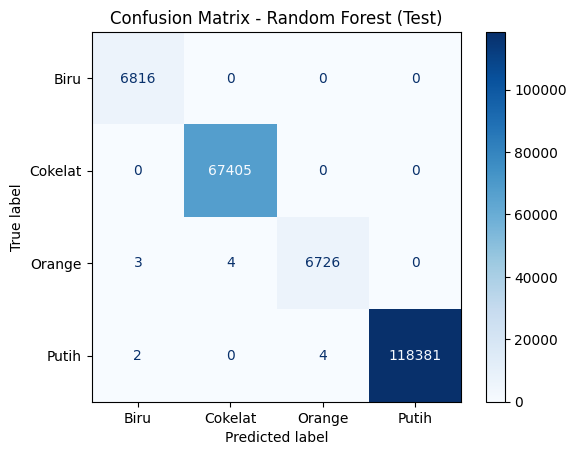

In [83]:
cm_rf = confusion_matrix(y_test_B, y_pred_rf_B_test)
label_asli = le.classes_
plt.figure(figsize=(5,4))
ConfusionMatrixDisplay(cm_rf, display_labels=label_asli).plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Random Forest (Test)")
plt.show()

#### Support Vector Machine

In [84]:
y_pred_svm_B_train = svm_B.predict(X_train_B_scaled)
y_pred_svm_B_val = svm_B.predict(X_val_B_scaled)
y_pred_svm_B_test = svm_B.predict(X_test_B_scaled)

acc_svm_B_train = accuracy_score(y_train_B, y_pred_svm_B_train)
acc_svm_B_val = accuracy_score(y_val_B, y_pred_svm_B_val)
acc_svm_B_test = accuracy_score(y_test_B, y_pred_svm_B_test)
print(f"Accuracy Support Vector Machine (Train): {acc_svm_B_train:.4f}")
print(f"Accuracy Support Vector Machine (Validation): {acc_svm_B_val:.4f}")
print(f"Accuracy Support Vector Machine (Test): {acc_svm_B_test:.4f}")

Accuracy Support Vector Machine (Train): 0.1493
Accuracy Support Vector Machine (Validation): 0.1487
Accuracy Support Vector Machine (Test): 0.1476


In [85]:
print("=== Evaluation on Test Set ===")
print(classification_report(y_test_B, y_pred_svm_B_test, target_names=le.classes_))

=== Evaluation on Test Set ===
              precision    recall  f1-score   support

        Biru       0.03      0.75      0.06      6816
     Cokelat       1.00      0.01      0.01     67405
      Orange       0.17      0.64      0.27      6733
       Putih       0.98      0.17      0.28    118387

    accuracy                           0.15    199341
   macro avg       0.55      0.39      0.16    199341
weighted avg       0.93      0.15      0.18    199341



In [86]:
cm_svm = confusion_matrix(y_test_B, y_pred_svm_B_test)
print("Confusion Matrix (array):")
print(cm_svm)

Confusion Matrix (array):
[[ 5083     0  1396   337]
 [47958   355 19092     0]
 [ 2402     0  4284    47]
 [98680     0     0 19707]]


<Figure size 500x400 with 0 Axes>

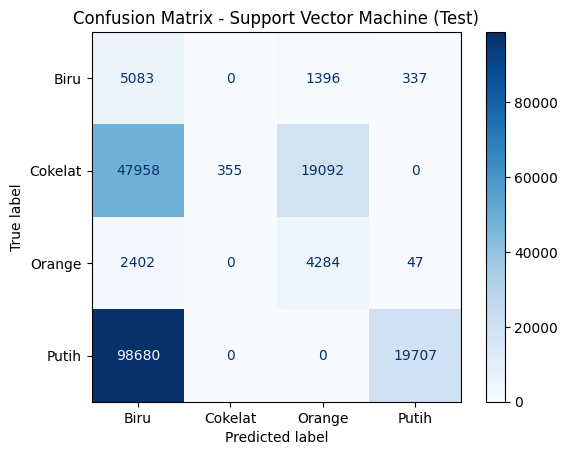

In [87]:
cm_svm = confusion_matrix(y_test_B, y_pred_svm_B_test)
label_asli = le.classes_
plt.figure(figsize=(5,4))
ConfusionMatrixDisplay(cm_svm, display_labels=label_asli).plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Support Vector Machine (Test)")
plt.show()

# **Compare Model Panel A dan Panel B**

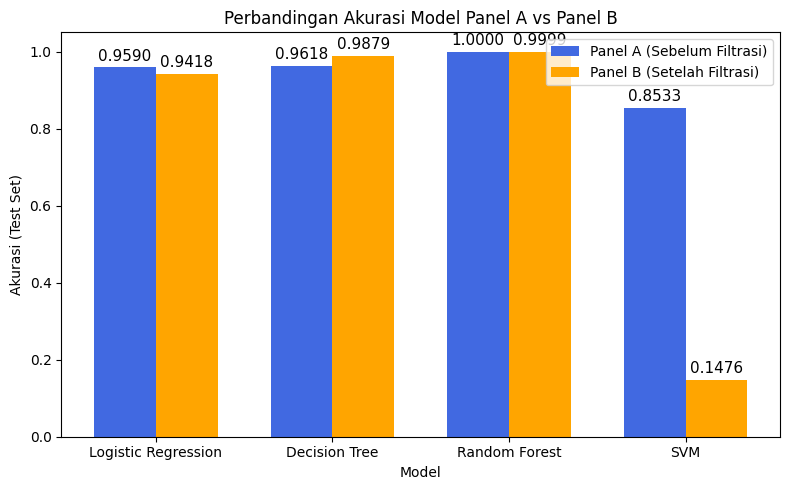

In [100]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
acc_test_A = [acc_logreg_A_test, acc_dt_A_test, acc_rf_A_test, acc_svm_A_test]
acc_test_B = [acc_logreg_B_test, acc_dt_B_test, acc_rf_B_test, acc_svm_B_test]

x = np.arange(len(model_names))
width = 0.35

plt.figure(figsize=(8,5))
bars1 = plt.bar(x - width/2, acc_test_A, width, label='Panel A (Sebelum Filtrasi)', color='royalblue')
bars2 = plt.bar(x + width/2, acc_test_B, width, label='Panel B (Setelah Filtrasi)', color='orange')

# Tampilkan nilai akurasi di atas bar
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f"{bar.get_height():.4f}", 
             ha='center', va='bottom', fontsize=11)
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f"{bar.get_height():.4f}", 
             ha='center', va='bottom', fontsize=11)

plt.ylabel('Akurasi (Test Set)')
plt.xlabel('Model')
plt.title('Perbandingan Akurasi Model Panel A vs Panel B')
plt.xticks(x, model_names, rotation=0)
plt.ylim(0, 1.05)
plt.legend()
plt.tight_layout()
plt.show()

# **Export Model**

## Panel A (Sebelum Filtrasi)

In [89]:
joblib.dump(rf_A, '../Models/best_model_rf_panelA.pkl')
joblib.dump(scaler_A, '../Models/scaler_panelA.pkl')
joblib.dump(le, '../Models/label_encoder_panelA.pkl')

print("Model, scaler, dan label encoder panel A berhasil diekspor!")

Model, scaler, dan label encoder panel A berhasil diekspor!


## Panel B (Setelah Filtrasi)

In [90]:
joblib.dump(rf_B, '../Models/best_model_rf_panelB.pkl')
joblib.dump(scaler_B, '../Models/scaler_panelB.pkl')
joblib.dump(le, '../Models/label_encoder_panelB.pkl')

print("Model, scaler, dan label encoder panel B berhasil diekspor!")

Model, scaler, dan label encoder panel B berhasil diekspor!


# **Saved Cleaned Dataset**

In [ ]:
panelA.to_csv('../Dataset/panelA_cleaned.csv', index=False)
panelB.to_csv('../Dataset/panelB_cleaned.csv', index=False)
print("Cleaned dataset berhasil disimpan!")

Cleaned dataset berhasil disimpan!


In [2]:
panelA_cleaned = pd.read_csv('../Dataset/panelA_cleaned.csv')
panelA_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   timestamp            1048575 non-null  object 
 1   id                   1048575 non-null  int64  
 2   flow1                1048575 non-null  float64
 3   turbidity            1048575 non-null  float64
 4   ph                   1048575 non-null  float64
 5   tds                  1048575 non-null  float64
 6   createdAt            1048575 non-null  object 
 7   updatedAt            1048575 non-null  object 
 8   quality_label        1048575 non-null  object 
 9   quality_label_enc_A  1048575 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 80.0+ MB


In [4]:
panelA_cleaned.head()

,timestamp,id,flow1,turbidity,ph,tds,createdAt,updatedAt,quality_label,quality_label_enc_A
0,1970-01-01 07:00:00,450992,0.0,4.563518,7.98,156.8765,2025-02-21 21:42:00,2025-02-21 21:42:00,Putih,3
1,1970-01-01 07:00:00,1278060,0.0,21.569630,7.50,112.7450,2025-04-22 22:35:00,2025-04-22 22:35:00,Orange,2
2,1970-01-01 07:00:00,1278059,0.0,21.568650,7.50,112.7399,2025-04-22 22:34:00,2025-04-22 22:34:00,Orange,2
3,1970-01-01 07:00:00,1278058,0.0,21.567870,7.50,112.7356,2025-04-22 22:34:00,2025-04-22 22:34:00,Orange,2
4,1970-01-01 07:00:00,1278057,0.0,21.567520,0.00,112.7371,2025-04-22 22:34:00,2025-04-22 22:34:00,Cokelat,1


In [3]:
panelB_cleaned = pd.read_csv('../Dataset/panelB_cleaned.csv')
panelB_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993401 entries, 0 to 1993400
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   timestamp            object 
 1   id                   int64  
 2   flow1                float64
 3   turbidity            float64
 4   ph                   float64
 5   tds                  float64
 6   createdAt            object 
 7   updatedAt            object 
 8   flow2                float64
 9   quality_label        object 
 10  quality_label_enc_B  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 167.3+ MB


In [5]:
panelB_cleaned.head()

,timestamp,id,flow1,turbidity,ph,tds,createdAt,updatedAt,flow2,quality_label,quality_label_enc_B
0,1970-01-28 03:53:42.642000+07:00,1759848,0.0,3.364695,7.25,143.8033,2025-05-14 08:26:01.557000+07:00,2025-05-14 08:26:01.557000+07:00,0.0,Putih,3
1,1970-01-28 03:54:21.085000+07:00,1759855,0.0,3.366403,7.25,143.7931,2025-05-14 08:26:39.996000+07:00,2025-05-14 08:26:39.996000+07:00,0.0,Putih,3
2,1970-01-05 01:45:13.159000+07:00,1831211,0.0,3.399860,7.33,161.7926,2025-05-25 03:35:06.020000+07:00,2025-05-25 03:35:06.020000+07:00,0.0,Putih,3
3,1970-01-05 01:45:18.650000+07:00,1831212,0.0,3.401232,7.33,161.7500,2025-05-25 03:35:11.516000+07:00,2025-05-25 03:35:11.516000+07:00,0.0,Putih,3
4,1970-01-05 01:45:24.141000+07:00,1831213,0.0,3.401707,7.32,161.7500,2025-05-25 03:35:17.005000+07:00,2025-05-25 03:35:17.005000+07:00,0.0,Putih,3


# **Inference Model**

## Panel A (Sebelum Filtrasi)

In [95]:
model = joblib.load('../Models/best_model_rf_panelA.pkl')
scaler = joblib.load('../Models/scaler_panelA.pkl')
le = joblib.load('../Models/label_encoder_panelA.pkl')

num_features_A = [
    'ph', 'turbidity', 'tds', 'flow1',
]

data_baru = np.array([
    [7, 2.5, 350, 1.5],
    [6.8, 2.8, 390, 1.7],
    [8.1, 4.2, 600, 1.2],
    [5.5, 7, 1190, 1.0],
    [7.4, 1.7, 305, 1.6]
])

print("Input data:")
for i, row in enumerate(data_baru, 1):
    print(f"Inference {i}:")
    for name, value in zip(num_features_A, row):
        print(f"  {name}: {value}")
    print()

data_baru_scaled = scaler.transform(data_baru)
pred = model.predict(data_baru_scaled)
label_prediksi = le.inverse_transform(pred)

print("Prediksi label:")
for i, label in enumerate(label_prediksi, 1):
    print(f"Inference {i}: {label}")

Input data:
Inference 1:
  ph: 7.0
  turbidity: 2.5
  tds: 350.0
  flow1: 1.5

Inference 2:
  ph: 6.8
  turbidity: 2.8
  tds: 390.0
  flow1: 1.7

Inference 3:
  ph: 8.1
  turbidity: 4.2
  tds: 600.0
  flow1: 1.2

Inference 4:
  ph: 5.5
  turbidity: 7.0
  tds: 1190.0
  flow1: 1.0

Inference 5:
  ph: 7.4
  turbidity: 1.7
  tds: 305.0
  flow1: 1.6

Prediksi label:
Inference 1: Cokelat
Inference 2: Cokelat
Inference 3: Biru
Inference 4: Biru
Inference 5: Putih


d:\Coolyeah\Dicoding\Submission_Dicoding\ml_ops\envs\urbansolv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Panel B (Setelah Filtrasi)

In [96]:
model = joblib.load('../Models/best_model_rf_panelB.pkl')
scaler = joblib.load('../Models/scaler_panelB.pkl')
le = joblib.load('../Models/label_encoder_panelB.pkl')

num_features_B = [
    'flow1', 'turbidity', 'ph', 'tds', 'flow2',
]

data_baru = np.array([
    [1.2, 3.5, 7.1, 400, 1.0],
    [1.5, 2.8, 6.8, 350, 1.2],
    [1.1, 4.0, 8.0, 600, 1.3],
    [0.9, 15,  5.5, 1200, 0.8],
    [1.7, 1.5, 7.5, 300, 1.6]
])

print("Input data:")
for i, row in enumerate(data_baru, 1):
    print(f"Inference {i}:")
    for name, value in zip(num_features_B, row):
        print(f"  {name}: {value}")
    print()

data_baru_scaled = scaler.transform(data_baru)
pred = model.predict(data_baru_scaled)
label_prediksi = le.inverse_transform(pred)

print("Prediksi label:")
for i, label in enumerate(label_prediksi, 1):
    print(f"Inference {i}: {label}")

Input data:
Inference 1:
  flow1: 1.2
  turbidity: 3.5
  ph: 7.1
  tds: 400.0
  flow2: 1.0

Inference 2:
  flow1: 1.5
  turbidity: 2.8
  ph: 6.8
  tds: 350.0
  flow2: 1.2

Inference 3:
  flow1: 1.1
  turbidity: 4.0
  ph: 8.0
  tds: 600.0
  flow2: 1.3

Inference 4:
  flow1: 0.9
  turbidity: 15.0
  ph: 5.5
  tds: 1200.0
  flow2: 0.8

Inference 5:
  flow1: 1.7
  turbidity: 1.5
  ph: 7.5
  tds: 300.0
  flow2: 1.6

Prediksi label:
Inference 1: Putih
Inference 2: Putih
Inference 3: Putih
Inference 4: Orange
Inference 5: Putih


d:\Coolyeah\Dicoding\Submission_Dicoding\ml_ops\envs\urbansolv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
